<a href="https://colab.research.google.com/github/rodrigowe1988/Data-Science-na-Pratica/blob/main/Dados_do_Airbnb_para_a_cidade_de_Porto_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos Dados do Airbnb - Porto (norte de Portugal)

O [Airbnb](https://www.airbnb.com.br/?landing_page_section=HEADER) já é considerado **a maior empresa hoteleira da atualidade**, detalhe: não possui nenhum hotel. 

Com o intuito de conectar pessoas que precisam de um lugar para hospedarem-se com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup criada 10 anos antes, já havia hospedado __mais de 300 milhões de pessoas__ ao redor de todo o mundo.

Uma das iniciativas do Airbnv é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para se desenvolver projetos e soluções de Data Science.

A seguir iremos analisar os dados referente à cidade de Porto no norte de Portugal.

<img src="https://viagemeturismo.abril.com.br/wp-content/uploads/2017/05/istock-533960357-1.jpg?resize=920,613">

Porto é uma cidade costeira no noroeste de Portugal conhecida pelas pontes imponentes e pela produção de vinho do Porto. No distrito medieval de Ribeira, às margens do rio, ruas estreitas de paralelepípedos passam pelas casas e pelos restaurantes dos comerciantes. A Igreja de São Francisco é conhecida pelo interior barroco exuberante com esculturas douradas ornamentadas. O suntuoso Palácio da Bolsa, do século XIX, era um mercado de ações e foi construído para impressionar investidores europeus em potencial. 

##Obtenção dos dados

Todos os dados usados nesse notebook foram obtidos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Para essa análise, foi utilizado somente o arquivo listings.csv da cidade do Porto em Portugal.

In [3]:
#importando os pacotes necessários 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#importar o arquivo do Airbnb com os dados da cidade de Porto
df = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2021-02-13/visualisations/listings.csv")

Análise dos Dados
Dicionário das variáveis

* id - número de id gerado para identificar o imóvel

* name - nome da propriedade anunciada

* host_id - número de id do proprietário (anfitrião) da propriedade

* host_name - Nome do anfitrião

* neighbourhood_group - esta coluna não contém nenhum valor válido

* neighbourhood - nome do bairro

* latitude - coordenada da latitude da propriedade

* longitude - coordenada da longitude da propriedade

* room_type - informa o tipo de quarto que é oferecido

* price - preço para alugar o imóvel

* minimum_nights - quantidade mínima de noites para reservar

* number_of_reviews - número de reviews que a propriedade possui

* last_review - data do último review

* reviews_per_month - quantidade de reviews por mês

* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião

* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [4]:
#imprimindo na tela as 5 primeiras entradas do DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,5,17,2018-09-28,0.18,1,222
1,42462,Large Penthouse in Vila Nova Gaia,185492,Gabriela,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.10739,-8.59430,Entire home/apt,73,30,39,2018-10-14,0.39,3,166
2,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.21,3,0
3,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.11,3,0
4,76436,Go2oporto @ River Side,399503,Go2oporto,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.13951,-8.61453,Entire home/apt,137,2,184,2020-08-13,1.63,13,358


##Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis? 

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" disponibilizada pelo Airbnb. Na mesma página, há uma versão mais completa com 35847 entradas e 106 variáveis(listings.csv.gz).

In [5]:
#identificar o volume de dados do DataFrame
print(f'Entradas:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}')

#verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	11128
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
#na próxima parte da análise exploraremos os dados ausentes do nosso dataframe
df.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2040
reviews_per_month                 2040
calculated_host_listings_count       0
availability_365                     0
dtype: int64

##Q2. Qual a porcentagem de valores ausentes no dataset?

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos para nossa análise.

* As variáveis reviews_per_month e last_review possuem os valores nulos em quase 20% das linhas.


In [10]:
#ordenar em ordem decrescente as variáveis por seus valores ausentes
print('Porcentagem do meu dataset que está com valores ausentes (separado por linha):')
print()
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

Porcentagem do meu dataset que está com valores ausentes (separado por linha):



reviews_per_month                 18.332135
last_review                       18.332135
host_name                          0.035945
name                               0.008986
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

##Q3. Qual o tipo de distribuição das variáveis?

Para identificar a distribuição das variáveis, plotamos a seguir um histograma para melhor visualização dos dados.

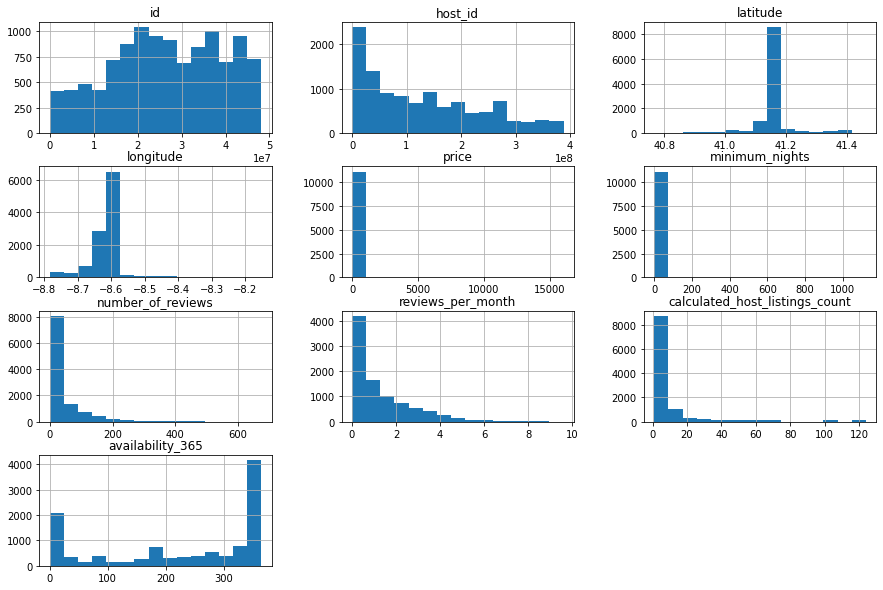

In [12]:
#plotar o histograma daa variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

##Q3. Há outliers presentes? 

Pela distribuição desse histograma é possível verificar indícios da presença de outliers(dados 'fora da curva'). Olhe, por exemplo, os gráficos da variável **price**, **minimum_nights** e **calculated_host_listings_count**. 

Os valores acabam distorcendo completamente os dados. Por exemplo na variável price, os preços variam entre 0 e mais de 10k euros a diária!!!



In [14]:
#ver o resumo estatístico das variáveis numéricas (usando o método "describe")
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11128.000000,11128.00000,11128.000000,9088.000000,11128.000000,11128.000000
mean,78.373113,3.12518,41.500090,1.267349,10.317937,226.730050
std,297.711681,15.87678,69.412309,1.361272,20.100679,141.392307
min,8.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,1.00000,1.000000,0.230000,1.000000,89.000000
50%,52.000000,2.00000,12.000000,0.740000,4.000000,278.000000
75%,75.000000,2.00000,51.000000,1.900000,8.000000,361.000000
max,16042.000000,1123.00000,675.000000,9.610000,124.000000,365.000000


###Através do resumo estatístico acima, podemos confirmar algumas hipóteses como:

* a variável __price__ possui 75% do valor acbaixo de 75 euros, porém há a ocorrência de outliers onde a diária chega amais de 16 mil euros!!

* há uma diferença de mais de 200 euros entre a média e a mediana dos preços justamente pela presença desses outliers.

* há anfitriões que solicitam o mínimo de 1123 dias de hospedagem.

Então o que fazer para resolver esse problema??? 

<img src="https://markpedder.files.wordpress.com/2016/04/creative-thinking.jpg?w=339&zoom=2" width="200px">



###Boxplot para **minimum_nights**

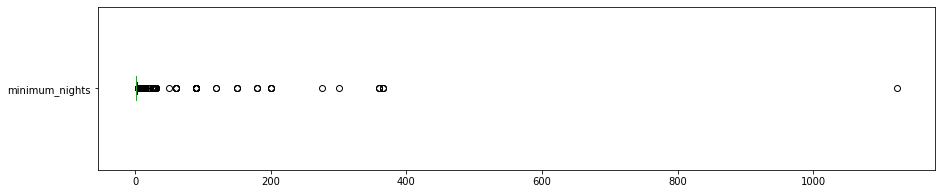


Valores acima de 5 dias da variável MINIMUM_NIGHTS:
São somente 477 entradas com mais de 5 dias de hospedagem mínima.
Esses dados equivalem a somente 4.29% de toda a amostra.


In [33]:
#coluna minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
print()

#ver a quantidade de valores acima de 5 dias para minimun_nights
print('Valores acima de 5 dias da variável MINIMUM_NIGHTS:')
print(f'São somente {len(df[df.minimum_nights > 5]):.0f} entradas com mais de 5 dias de hospedagem mínima.')
print(f'Esses dados equivalem a somente {len(df[df.minimum_nights > 5]) / df.shape[0] * 100:.2f}% de toda a amostra.')

###Boxplot para **price**

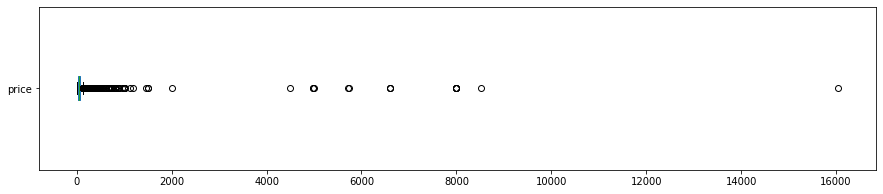


Valores acima de 150 euros da variável PRICE:
São somente 1389 entradas com valor acima de 100 euros a diária.
Esses dados equivalem a somente 12.48% de toda a amostra.


In [26]:
#coluna price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
print()

#ver a quantidade de valores acima de 30 dias para minimun_nights
print('Valores acima de 150 euros da variável PRICE:')
print(f'São somente {len(df[df.price > 100]):.0f} entradas com valor acima de 100 euros a diária.')
print(f'Esses dados equivalem a somente {len(df[df.price > 100]) / df.shape[0] * 100:.2f}% de toda a amostra.')

###Histogramas sem _outliers_

Já que identificamos outliers nas variáveis __price__ e __minimum_nights__, vamos agora "limpá-los" de nosso DataFrame e plotar o histograma atualizado.

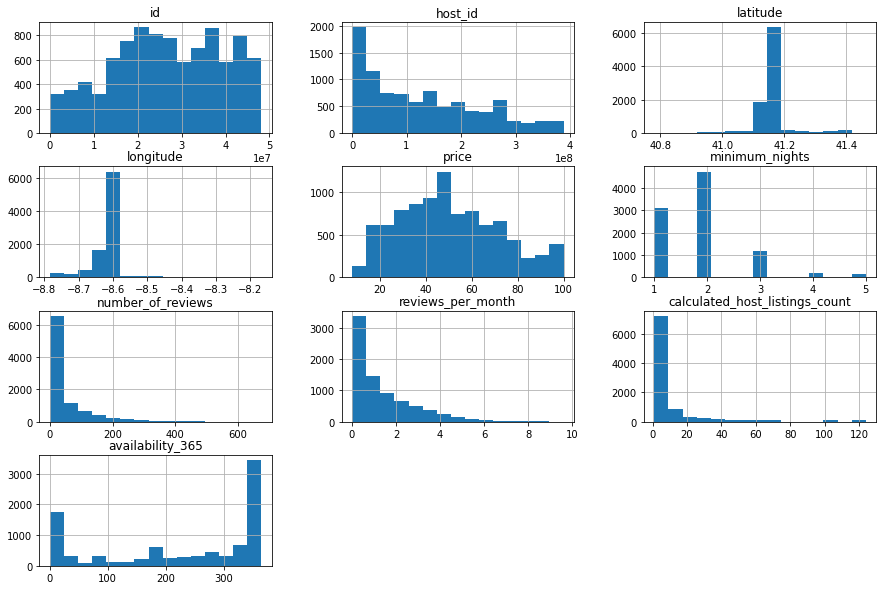

In [30]:
#remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 100].index, axis=0, inplace=True )
df_clean.drop(df_clean[df_clean.minimum_nights > 5].index, axis=0, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15, 10));

###Também podemos visualizar o método _describe()_ atualizado com esse novo DataFrame

Perceba o quão mais *clean* está agora. Podemos visualizar que:

* 75% das opções para locação estão abaixo de 65 euros;

* a média caiu para 50 euros e a mediana está abaixo de 22 euros;

In [57]:
#ver o resumo estatístico das variáveis numéricas (usando o método "describe")
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9322.000000,9322.000000,9322.000000,7786.000000,9322.000000,9322.000000
mean,50.606415,1.880927,44.391225,1.341861,10.568226,225.842738
std,21.714706,0.809359,70.641986,1.391899,20.101670,141.447104
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,34.000000,1.000000,2.000000,0.270000,1.000000,89.000000
50%,49.000000,2.000000,14.000000,0.820000,4.000000,274.000000
75%,65.000000,2.000000,57.000000,2.020000,9.000000,361.000000
max,100.000000,5.000000,675.000000,9.610000,124.000000,365.000000


##Q4. Qual a correlação existente entre as variáveis

Correlação significa que existe uma relação entre duas coisas. No nosso contexto estamos buscando relação entre duas variáveis.

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos: 

* criar uma matriz de correlação

* gerar um heatmap (mapa de calor) a partir dessa matriz usando a biblioteca _seaborn_

In [35]:
#criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.072118,-0.151630,-0.236632,-0.000512,0.059625
minimum_nights,0.072118,1.000000,0.018072,-0.090898,-0.120610,-0.100599
number_of_reviews,-0.151630,0.018072,1.000000,0.824462,-0.082891,0.018751
reviews_per_month,-0.236632,-0.090898,0.824462,1.000000,-0.020372,0.062571
calculated_host_listings_count,-0.000512,-0.120610,-0.082891,-0.020372,1.000000,0.092715
availability_365,0.059625,-0.100599,0.018751,0.062571,0.092715,1.000000


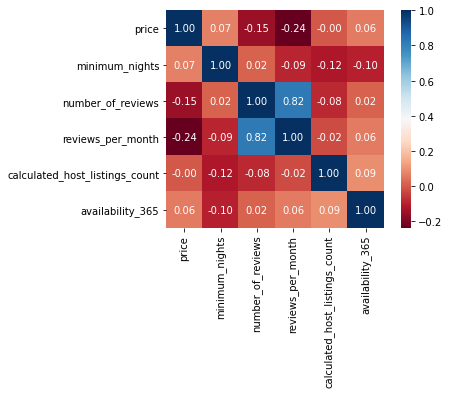

In [37]:
#mapa de calor (heatmap)
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

##Q5. Qual o tipo de imóvel mais alugado no Airbnb?

A coluna da variável _room_type_ indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um querto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método _value_counts()_.

In [38]:
#mostrar a quantidade de cada tipo de imóvel disponível para locação
df_clean.room_type.value_counts()

Entire home/apt    7062
Private room       1968
Hotel room          169
Shared room         123
Name: room_type, dtype: int64

In [51]:
#mostrar a porcentagem de cada tipo de imóvel disponível
print('tipo de locação\t       %')
print('-' * 30)
df_clean.room_type.value_counts() / df_clean.shape[0] * 100


tipo de locação	       %
------------------------------


Entire home/apt    75.756275
Private room       21.111349
Hotel room          1.812916
Shared room         1.319459
Name: room_type, dtype: float64

##Q6. Qual é a localidade mais cara de Porto?

Uma das maneiras de se verificar uma variável em função da outra é usando _group_by()_. No caso, queremos comparar os bairros (_neighbourhoods_) a partir do preço de locação.

In [52]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Alvarelhos e Guidões         100.000000
Fajozes                       95.000000
Santa Eulália                 91.000000
Alvarenga                     90.000000
Moldes                        86.000000
Covelo de Paivó e Janarde     85.000000
Sobreira                      85.000000
Lamelas e Guimarei            84.000000
Macieira de Cambra            83.285714
Muro                          81.500000
Name: price, dtype: float64

###Acima vemos que os bairros **Alvarelhos e Guidões**, **Fajozes**, **Santa Eulália** e **Alvarenga** são os que possuem as maiores médias.

Mas será que isso é suficiente para dizermos com certeza que são os locais mais caros de Porto ou somente são casos isolados?

In [54]:
#ver a quantidade de imóveis no bairro Alvarelhos e Guidões
print(df_clean[df_clean.neighbourhood == "Alvarelhos e Guidões"].shape)

#ver as 2 entradas de locação desse bairro
df_clean[df_clean.neighbourhood == "Alvarelhos e Guidões"]

(2, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
301,2083027,Casa da Adega - Arco Village- QA,10602021,Lucio,TROFA,Alvarelhos e Guidões,41.31074,-8.61901,Entire home/apt,100,2,27,2019-09-01,0.40,1,349
9552,42115738,Porto-Braga Country Side (Piscina privada),334047684,Cristina,TROFA,Alvarelhos e Guidões,41.31201,-8.61620,Entire home/apt,100,2,16,2020-10-04,1.85,1,255


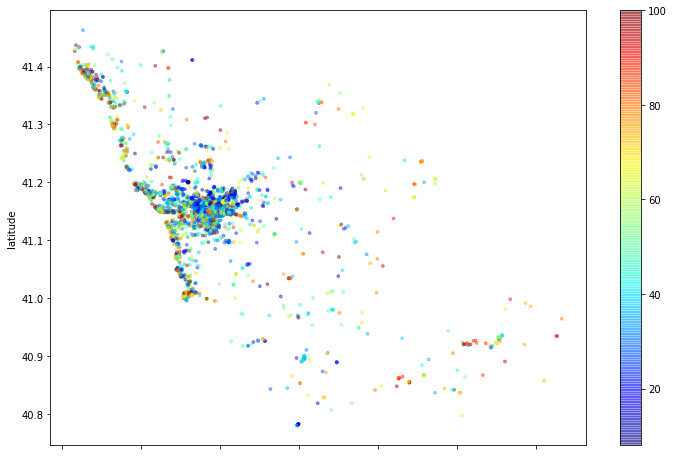

In [56]:
#plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8));

#Conclusão

Isso é apenas uma análise superficial do banco de dados disponibilizado pelo Airbnb para mostrar o quão importante pode ser a manipulação correta de dados.

Em todas as áreas o Cientista de Dados consegue tirar melhor proveito dos dados e transformá-los em informação relevante para uso, seja para obtenção de lucro(indústrias, comércio,...), seja para salvar vidas(área da saúde).

Lembrando que esse DataFrame é uma versão resumida, podendo ser muito mais explorado futuramente.

